In [1]:
import pandas as pd
import os
from draft_config.config_params import get_config
import matplotlib.pyplot as plt
import sqlite3
import numpy as np 

In [2]:
root = os.path.dirname(os.getcwd()) + '/' # Because of notebook details
params = get_config()
connection_string = f'{root}{params.db_path}'
print(connection_string)
connection = sqlite3.connect(f'{root}{params.db_path}')
cursor = connection.cursor()

c:\Users\omara\Desktop\workspace\nba_draft_prediction/etl/nba.db


In [3]:
# See the table names in the database
table_names_execution = cursor.execute("""SELECT name from sqlite_master WHERE type='table';""")
table_names_fetched = table_names_execution.fetchall()

print(table_names_fetched)

[('draft_data_raw',), ('ncaa_data_raw',)]


In [4]:
draft_df = pd.read_sql_query(sql="""SELECT * FROM draft_data_raw;""", con=connection)
ncaa_df = pd.read_sql_query(sql="""SELECT * FROM ncaa_data_raw""", con=connection)

# NBA Draft Data Exploration

In [5]:
# Starting with the raw draft data
draft_df

,player,team,affiliation,year,round_number,round_pick,overall_pick
0,Victor Wembanyama,San Antonio Spurs,Metropolitans 92 (France),2023,1,1,1
1,Brandon Miller,Charlotte Hornets,Alabama,2023,1,2,2
2,Scoot Henderson,Portland Trail Blazers,Ignite (G League),2023,1,3,3
3,Amen Thompson,Houston Rockets,Overtime Elite,2023,1,4,4
4,Ausar Thompson,Detroit Pistons,Overtime Elite,2023,1,5,5
...,...,...,...,...,...,...,...
8252,Mark Jellison,Capital Bullets,Northeastern,1973,8,13,133
8253,Steve Rowell,New York Knicks,Rhode Island,1973,8,14,134
8254,Walt McGrary,Milwaukee Bucks,Tennessee-Chattanooga,1973,8,15,135
8255,Roy McPipe,Los Angeles Lakers,Montana State,1973,8,16,136


In [6]:
# Looking at how many players come from each affiliation overall
overall_counts = draft_df[['affiliation', 'player']].groupby(by='affiliation', sort=True).count()
overall_counts = overall_counts.reset_index()
overall_counts = overall_counts.sort_values(by='player', ascending=False)
overall_counts

,affiliation,player
405,Kentucky,141
148,California-Los Angeles,126
554,North Carolina,116
239,Duke,109
401,Kansas,91
...,...,...
412,LSU-Atletas (Lithuania),1
666,Rochester Tech,1
665,Rochester (NY),1
414,La Verne,1


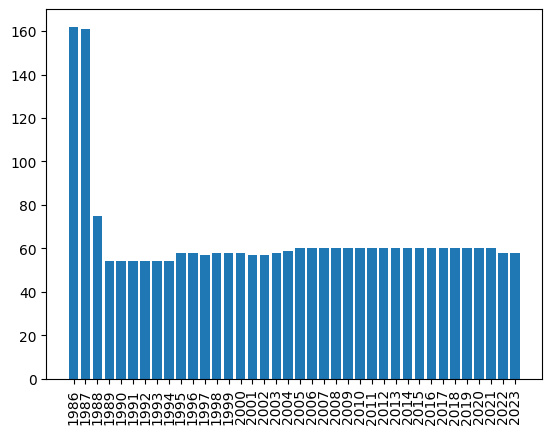

In [7]:
counts_by_year = draft_df[['affiliation', 'player', 'year']].groupby(by='year', sort=True).count()
counts_by_year = counts_by_year.reset_index()
counts_by_year = counts_by_year[counts_by_year['year']>'1985']
plt.bar(counts_by_year['year'], counts_by_year['player'])
plt.xticks(rotation=90)
plt.show()
# Roughly 60 people per year have been drafted into the NBA since 1989. This is an important deduction for later

In [8]:
new_counts = draft_df[draft_df['year'] >= '2015'][['affiliation', 'player']].groupby(by='affiliation', sort=True).count()
new_counts = new_counts.reset_index()
new_counts = new_counts.sort_values(by='player', ascending=False)
new_counts 

,affiliation,player
76,Kentucky,28
38,Duke,26
26,California-Los Angeles,12
91,Michigan,11
74,Kansas,11
...,...,...
63,Illinois,1
62,Illawarra (Australia),1
58,Hofstra,1
57,Hapoel Galil Elyon (Israel),1


In [9]:
len(set(new_counts['affiliation']))

175

In [10]:
new_counts['player'].sum()

536

# NCAA data exploration

In [11]:
ncaa_df

,rank,name,university,position,games_played,minutes_per_game,points_per_game,average_field_goals_made,average_field_goals_attempted,field_goal_percentage,...,three_point_field_goal_percentage,average_free_throws_made,average_free_throws_attempted,free_throws_percentage,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game,ncaa_year
0,1,Ruben Douglas,UNM,G,28,35.1,28.0,7.8,19.6,39.7,...,39.5,39.7,10.8,84.1,6.6,2.1,1.3,0.3,3.9,2002-03
1,2,Henry Domercant,EIU,G,29,33.7,27.9,8.7,19.0,45.8,...,42.4,45.8,9.1,84.4,6.9,2.8,1.4,0.5,2.4,2002-03
2,3,Mike Helms,OAK,G,28,34.5,26.9,8.6,19.0,45.2,...,37.9,45.2,9.4,74.5,4.0,2.0,1.4,0.3,3.8,2002-03
3,4,Michael Watson,KC,G,29,38.8,25.5,8.5,22.6,37.7,...,35.0,37.7,5.9,75.3,3.7,3.8,1.4,0.2,3.7,2002-03
4,5,Troy Bell,BC,G,31,38.6,25.2,7.2,16.4,44.1,...,40.2,44.1,8.6,84.7,4.6,3.7,2.3,0.2,2.5,2002-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18832,3277,Marcus Filien,ALB,F,10,5.8,0.2,0.0,0.4,0.0,...,0.0,0.0,0.2,100.0,1.5,0.0,0.2,0.4,0.2,2023-24
18833,3278,Syrus Grisby,PV,F,7,8.4,0.1,0.0,1.0,0.0,...,0.0,0.0,0.3,50.0,1.7,0.4,0.3,0.4,0.4,2023-24
18834,3279,Jeremiah Bembry,WVU,G,7,3.3,0.0,0.0,0.7,0.0,...,0.0,0.0,0.1,0.0,0.4,0.4,0.0,0.0,0.0,2023-24
18835,3279,Cedric Lath,HOU,C,8,2.9,0.0,0.0,0.4,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.3,2023-24


In [12]:
ncaa_df.columns

Index(['rank', 'name', 'university', 'position', 'games_played',
       'minutes_per_game', 'points_per_game', 'average_field_goals_made',
       'average_field_goals_attempted', 'field_goal_percentage',
       'average_three_point_field_goals_made',
       'average_three_point_field_goals_attempted',
       'three_point_field_goal_percentage', 'average_free_throws_made',
       'average_free_throws_attempted', 'free_throws_percentage',
       'rebounds_per_game', 'assists_per_game', 'steals_per_game',
       'blocks_per_game', 'turnovers_per_game', 'ncaa_year'],
      dtype='object')

In [13]:
# We'll want to look at the dynamics for each draft year

## It seems that the number of college players tracked with time is inconsistent. ESPN is a well-known source platform and likely has reliable information
ncaa_df[['ncaa_year','name']].reset_index().groupby(by='ncaa_year').count().sort_values(by='ncaa_year', ascending=False) 

,index,name
ncaa_year,,
2023-24,3281,3281
2022-23,500,500
2021-22,700,700
2020-21,2905,2905
2019-20,450,450
2018-19,450,450
2017-18,650,650
2015-16,500,500
2014-15,250,250


In [14]:
# Given that the draft only takes about 60 people a year, let's try and look at NCAA stats over the past 6 years


# Convert NCAA columns to values as needed
ncaa_df[['minutes_per_game', 'points_per_game', 'average_field_goals_made',
       'average_field_goals_attempted', 'field_goal_percentage',
       'average_three_point_field_goals_made',
       'average_three_point_field_goals_attempted',
       'three_point_field_goal_percentage', 'average_free_throws_made',
       'average_free_throws_attempted', 'free_throws_percentage',
       'rebounds_per_game', 'assists_per_game', 'steals_per_game',
       'blocks_per_game', 'turnovers_per_game']] = ncaa_df[['minutes_per_game', 'points_per_game', 'average_field_goals_made',
       'average_field_goals_attempted', 'field_goal_percentage',
       'average_three_point_field_goals_made',
       'average_three_point_field_goals_attempted',
       'three_point_field_goal_percentage', 'average_free_throws_made',
       'average_free_throws_attempted', 'free_throws_percentage',
       'rebounds_per_game', 'assists_per_game', 'steals_per_game',
       'blocks_per_game', 'turnovers_per_game']].astype(np.float64)

ncaa_df['games_played'] = ncaa_df['games_played'].astype(np.int32)

In [15]:
ncaa_df.dtypes

rank                                          object
name                                          object
university                                    object
position                                      object
games_played                                   int32
minutes_per_game                             float64
points_per_game                              float64
average_field_goals_made                     float64
average_field_goals_attempted                float64
field_goal_percentage                        float64
average_three_point_field_goals_made         float64
average_three_point_field_goals_attempted    float64
three_point_field_goal_percentage            float64
average_free_throws_made                     float64
average_free_throws_attempted                float64
free_throws_percentage                       float64
rebounds_per_game                            float64
assists_per_game                             float64
steals_per_game                              f

<Axes: >

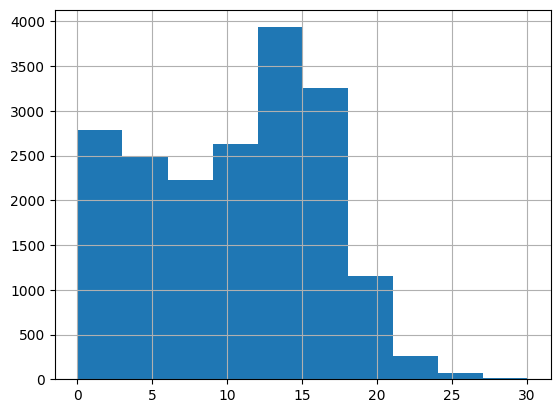

In [16]:
ncaa_df['points_per_game'].hist()

In [19]:
# Position Information
tmp_counts = ncaa_df[['position', 'name', 'ncaa_year']].groupby(by=['ncaa_year', 'position']).count().reset_index()
tmp_counts

,ncaa_year,position,name
0,2002-03,C,2
1,2002-03,F,36
2,2002-03,F-C,2
3,2002-03,G,59
4,2002-03,G-F,1
...,...,...,...
106,2023-24,G,1954
107,2023-24,PF,2
108,2023-24,PG,3
109,2023-24,SF,1


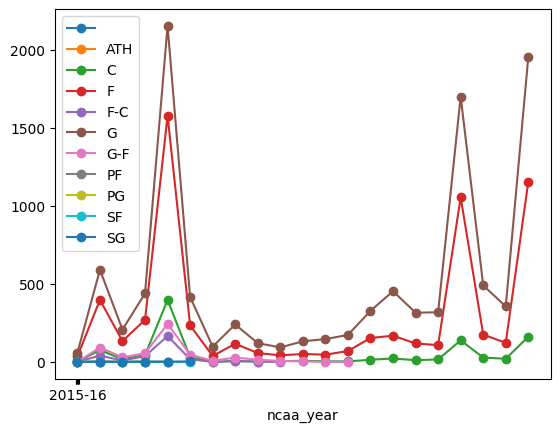

In [22]:
tmp_counts.set_index('ncaa_year').groupby('position')['name'].plot(marker='o', linestyle='-', legend=True)
plt.show()